<a href="https://colab.research.google.com/github/animesh27saini/facial-sentiment-analysis/blob/main/facial_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import cv2

import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install pillow

In [ ]:
img = cv2.imread('/content/drive/MyDrive/fer/img/test/0/PrivateTest_1054527.jpg')


In [ ]:
img.shape

(48, 48, 3)

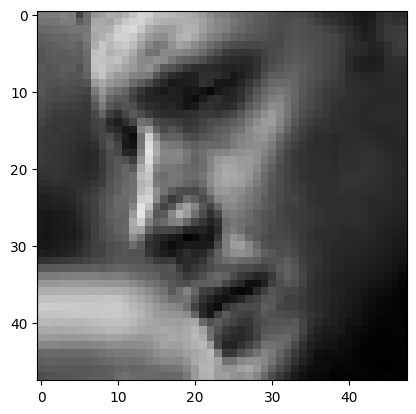

In [ ]:
plt.imshow(img)

In [ ]:
print(img)

[[[123 123 123]
  [123 123 123]
  [126 126 126]
  ...
  [ 52  52  52]
  [ 46  46  46]
  [ 43  43  43]]

 [[116 116 116]
  [115 115 115]
  [116 116 116]
  ...
  [ 52  52  52]
  [ 49  49  49]
  [ 51  51  51]]

 [[105 105 105]
  [107 107 107]
  [109 109 109]
  ...
  [ 57  57  57]
  [ 57  57  57]
  [ 60  60  60]]

 ...

 [[ 96  96  96]
  [ 98  98  98]
  [ 97  97  97]
  ...
  [  1   1   1]
  [  2   2   2]
  [  3   3   3]]

 [[ 87  87  87]
  [ 90  90  90]
  [ 90  90  90]
  ...
  [  1   1   1]
  [  2   2   2]
  [  1   1   1]]

 [[ 78  78  78]
  [ 81  81  81]
  [ 84  84  84]
  ...
  [  4   4   4]
  [  4   4   4]
  [  3   3   3]]]


In [ ]:
Datadirectory = "/content/drive/MyDrive/fer/img/train"

In [ ]:
classes = ["0","1","2","3","4","5","6"]

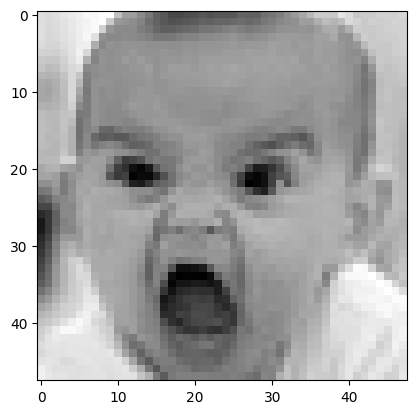

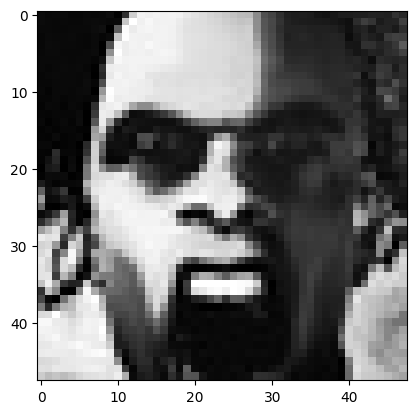

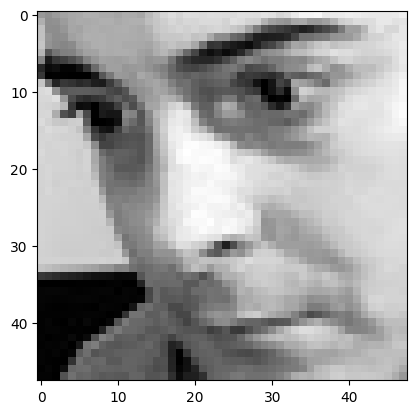

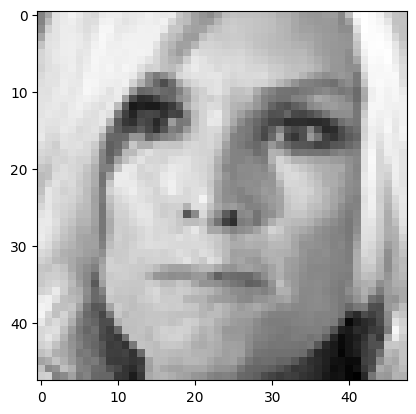

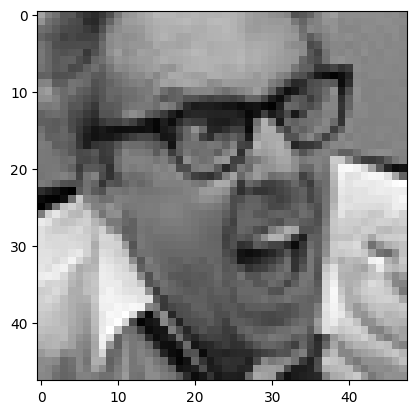

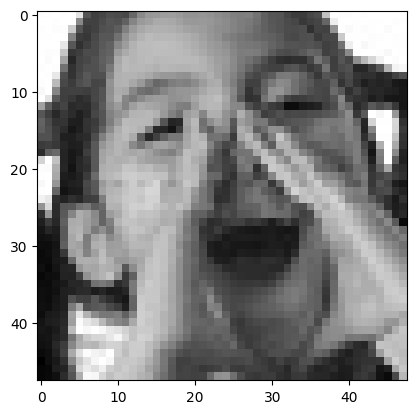

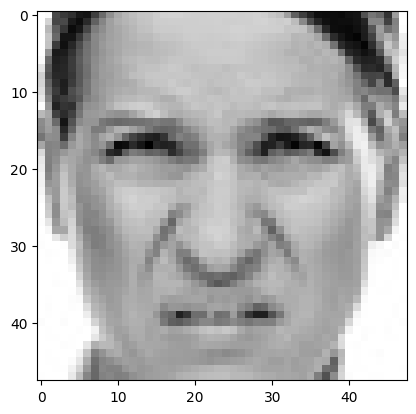

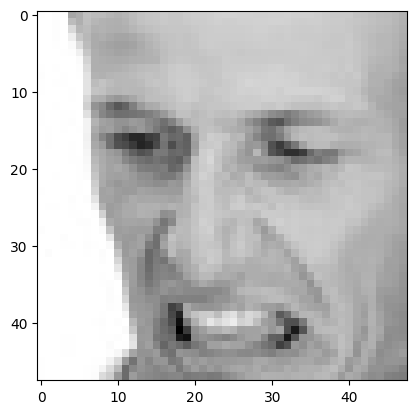

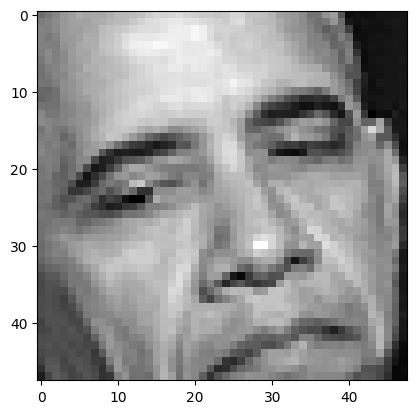

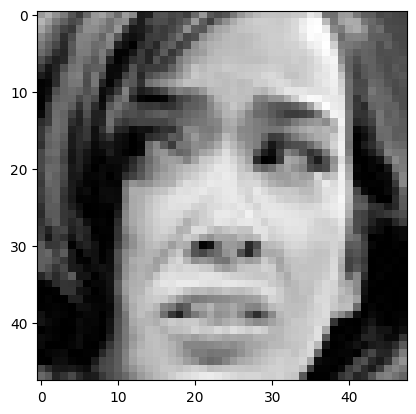

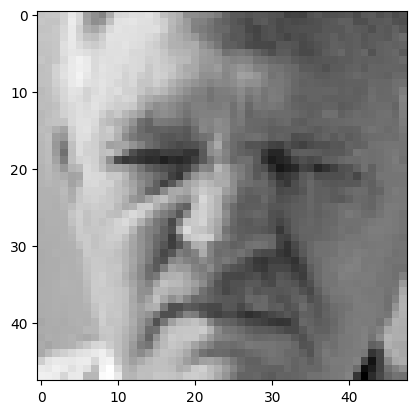

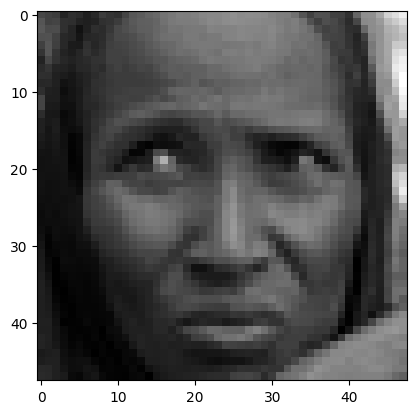

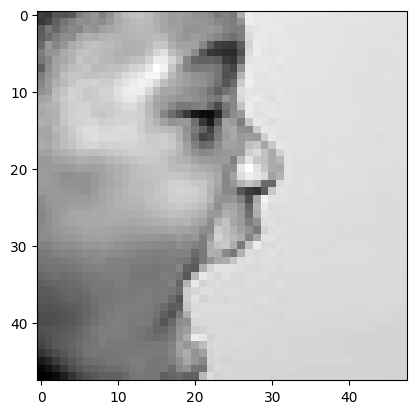

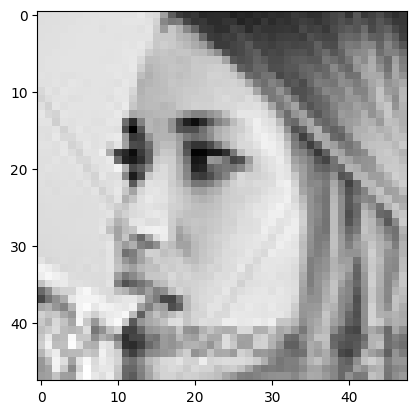

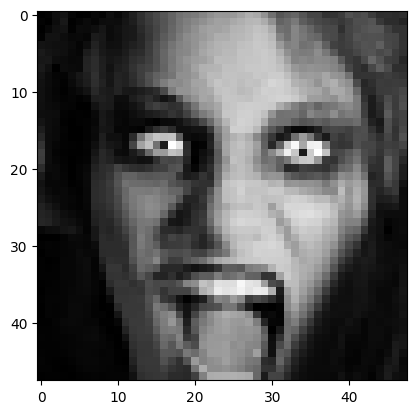

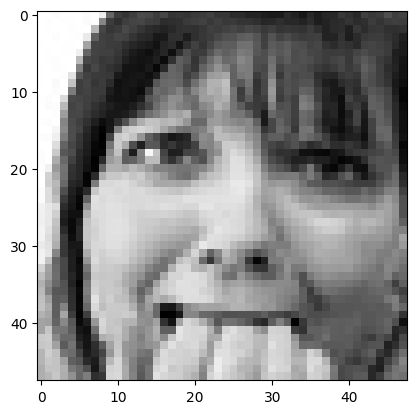

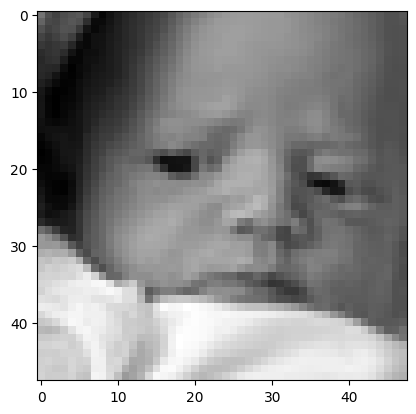

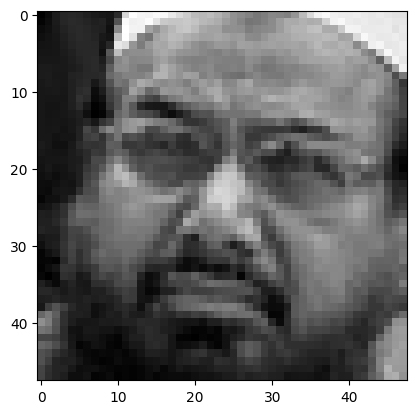

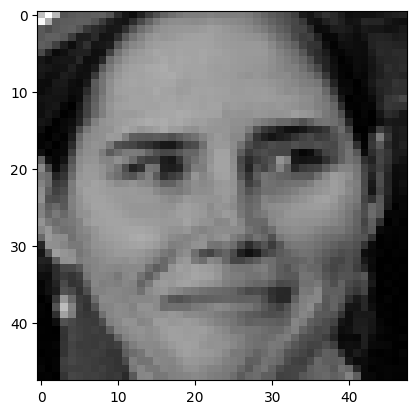

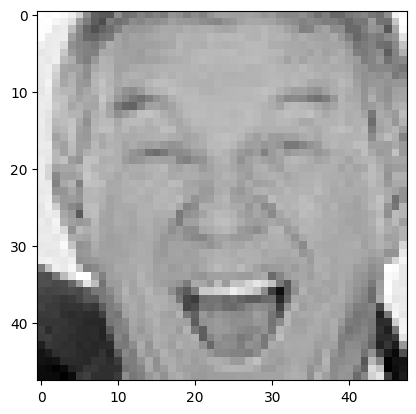

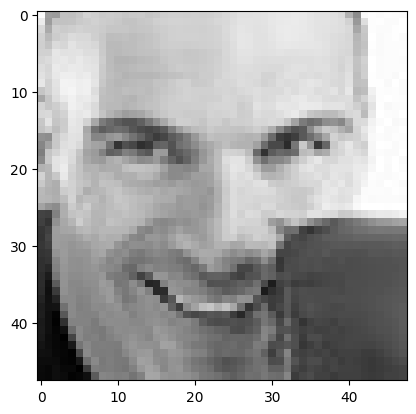

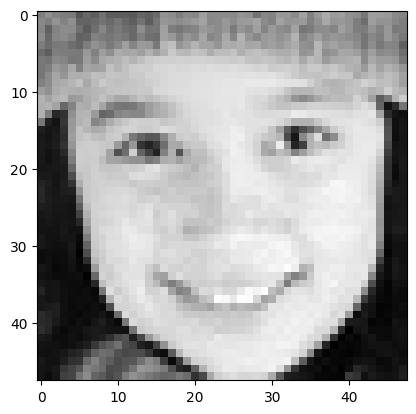

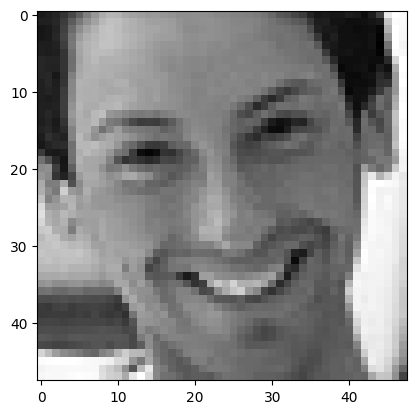

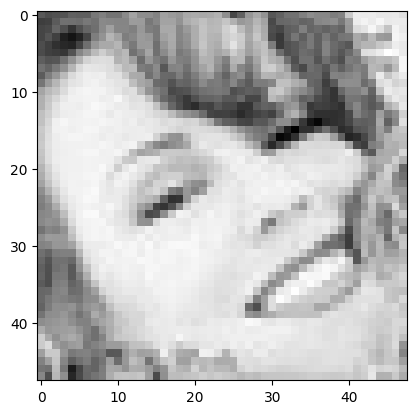

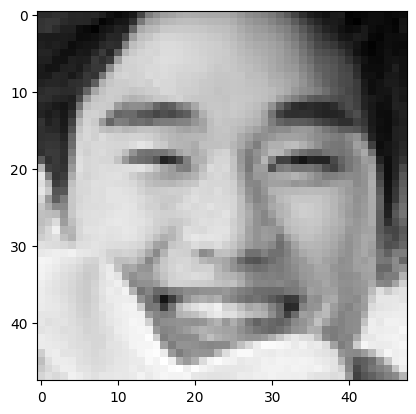

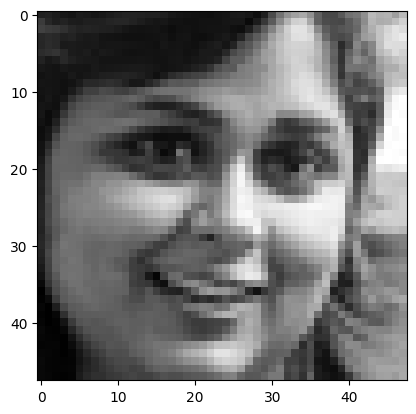

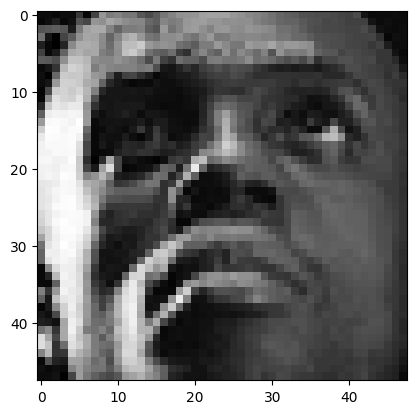

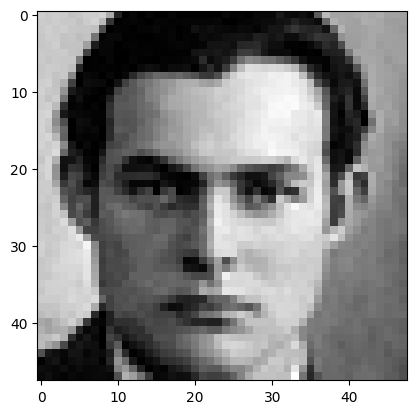

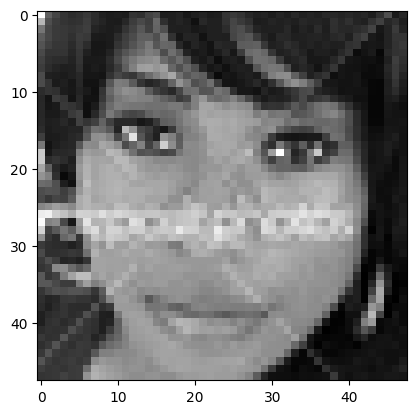

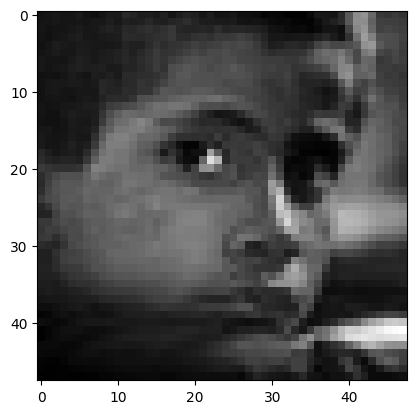

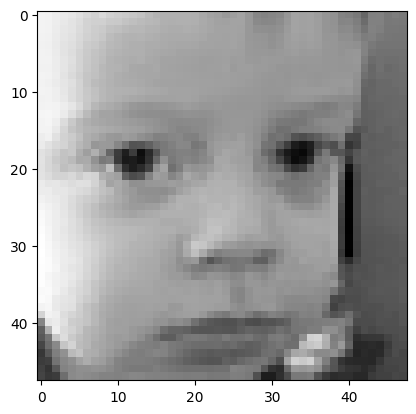

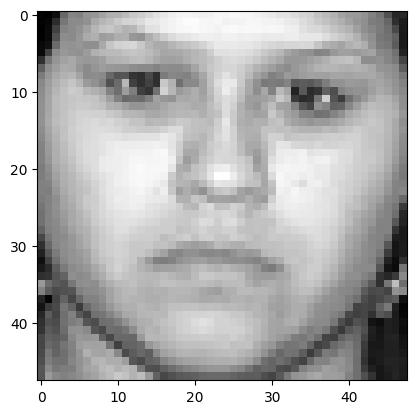

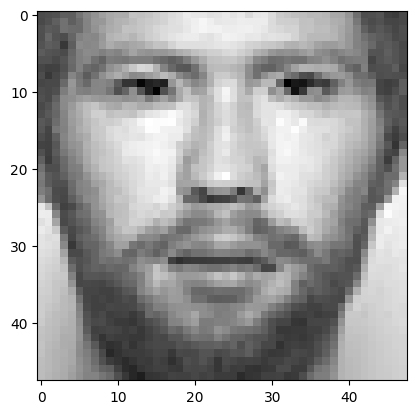

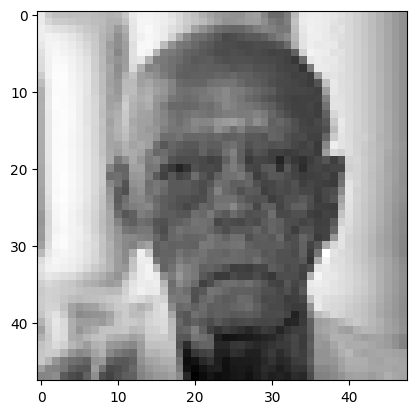

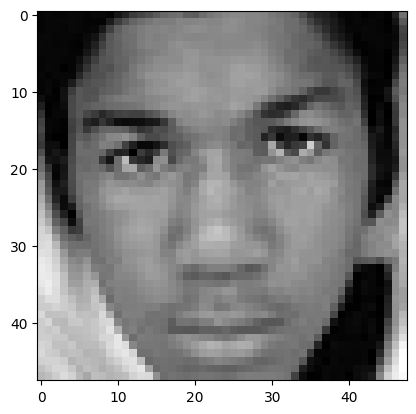

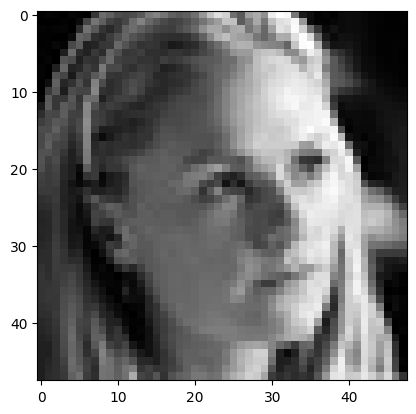

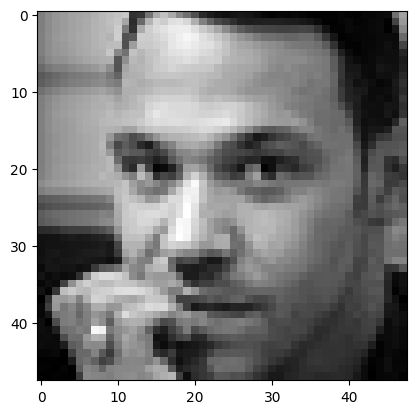

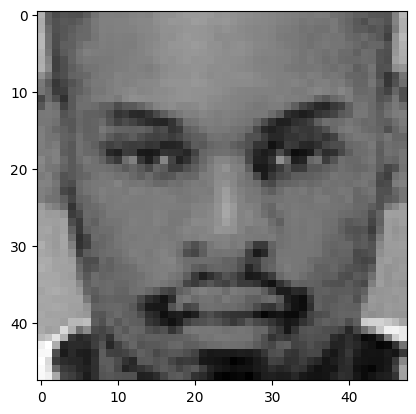

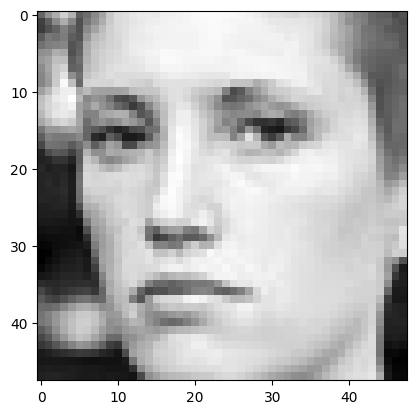

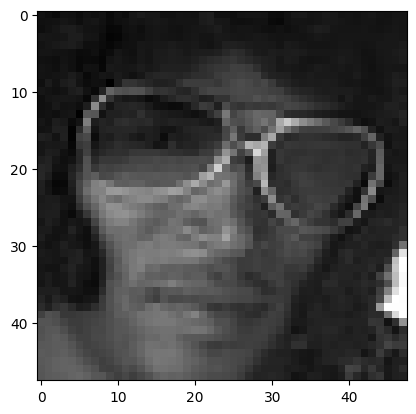

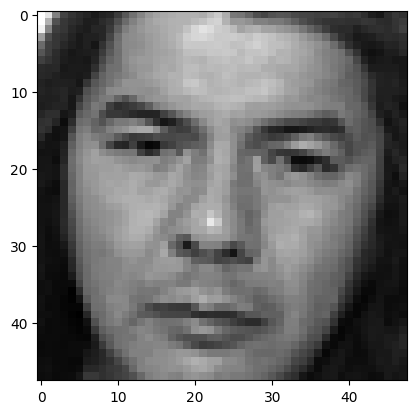

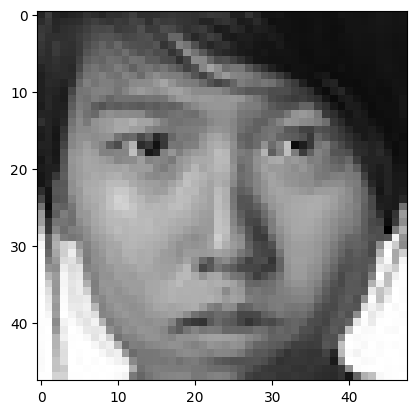

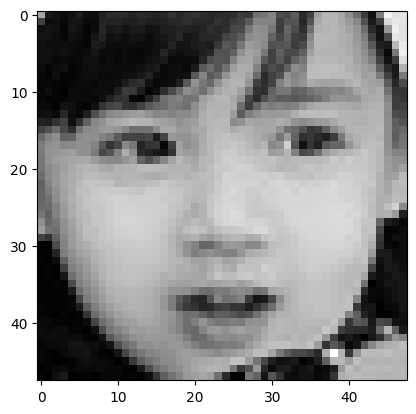

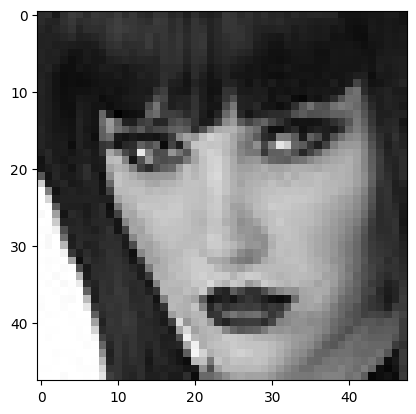

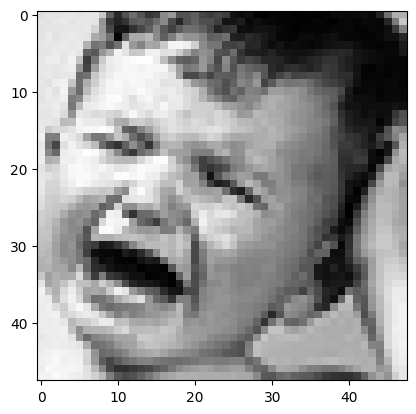

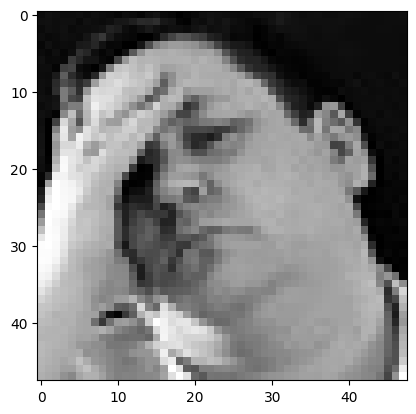

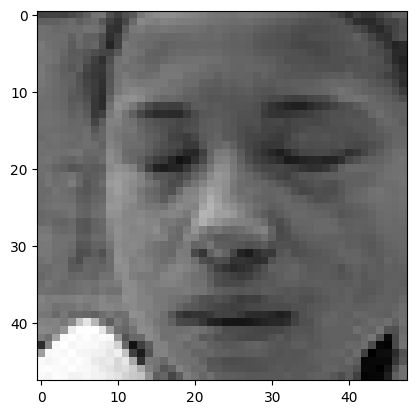

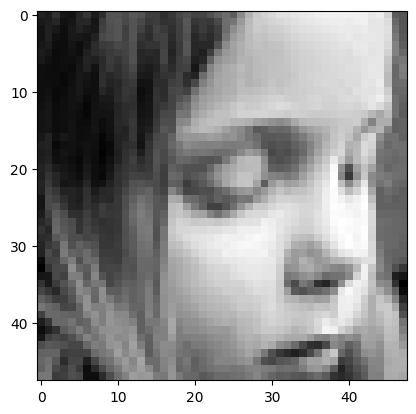

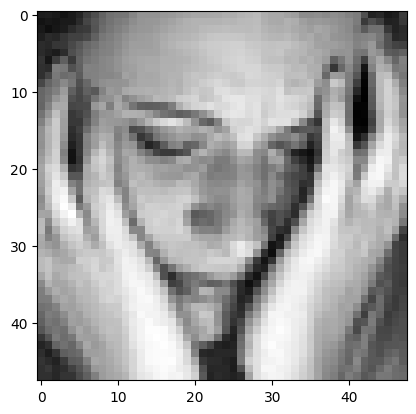

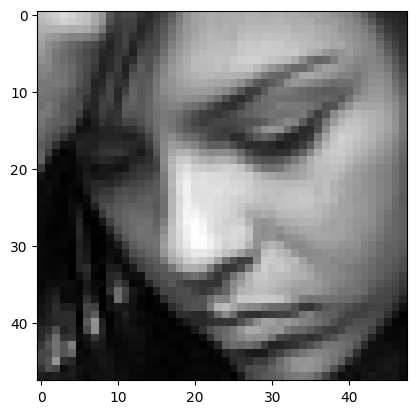

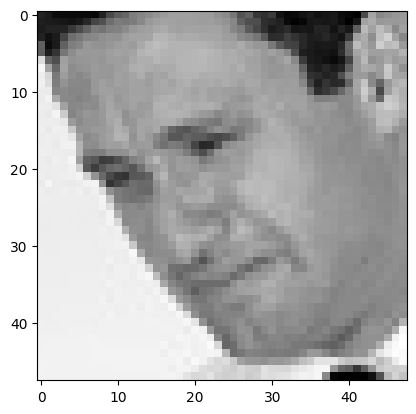

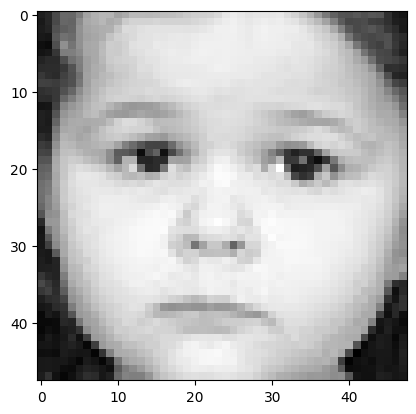

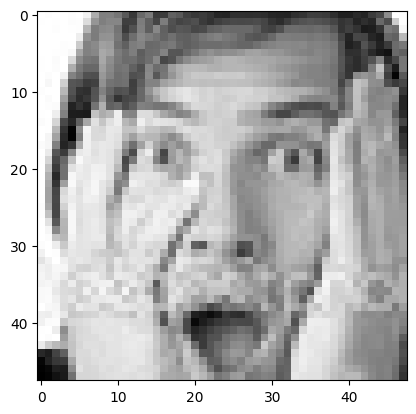

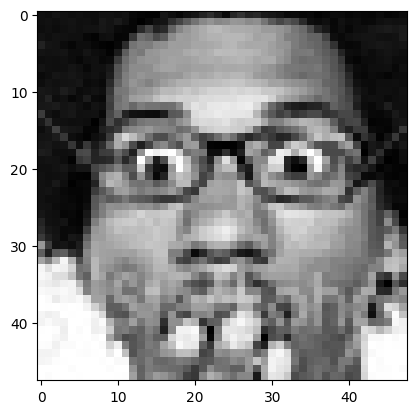

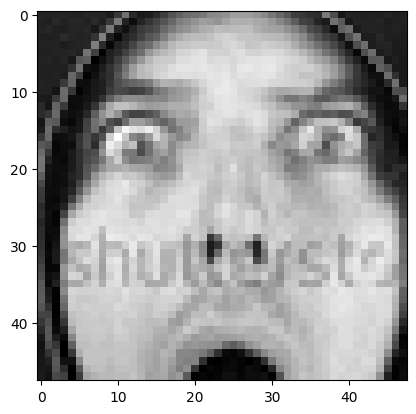

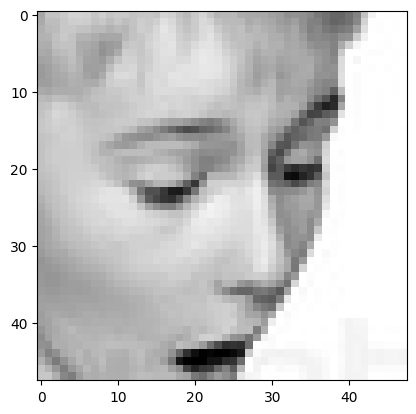

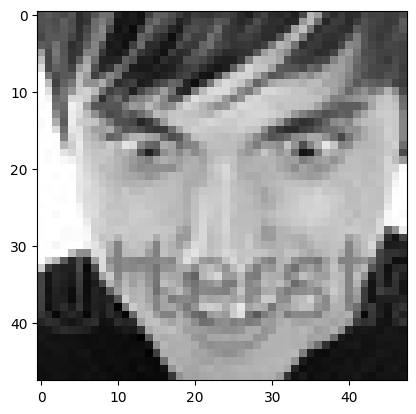

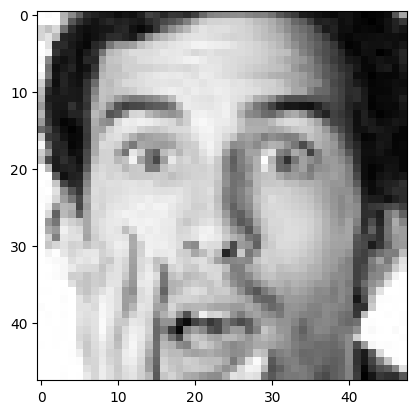

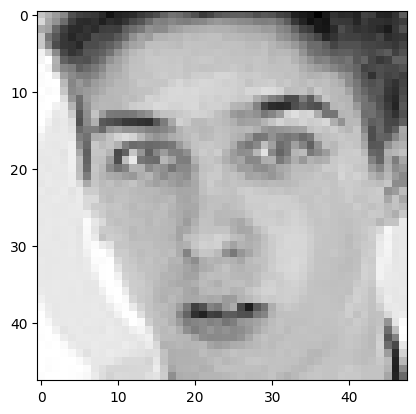

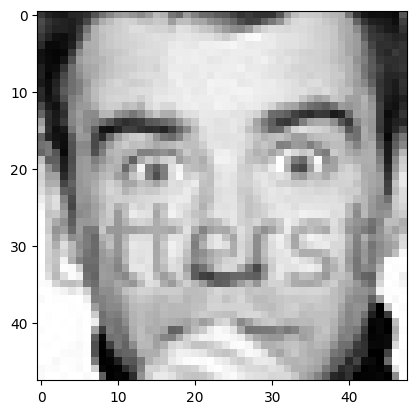

<Figure size 640x480 with 0 Axes>

In [ ]:
for category in classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        if img.endswith((".png", ".jpg", ".jpeg")):
            img_array = cv2.imread(os.path.join(path, img), 0)
            plt.imshow(img_array, cmap="gray")
            plt.show()
            plt.clf()

In [ ]:
img_array.shape

(48, 48)

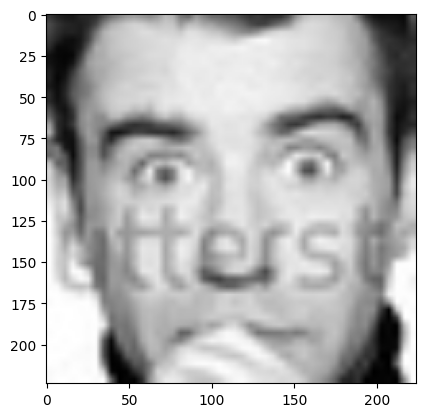

In [ ]:
img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new_array.shape

(224, 224)

READ ALL IMAGES AND CONVERT THEM INTO ARRAYS

In [ ]:
training_data = []

def create_training_data():
  for category in classes:
    path = os.path.join(Datadirectory,category)
    class_num = classes.index(category)
    for img in os.listdir(path):
      try:
        img = cv2.imread(os.path.join(path,img))
        new_img = cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_img,class_num])
      except Exception as e:
        pass

In [ ]:
create_training_data()

In [ ]:
print(len(training_data))

60


In [ ]:
import random

random.shuffle(training_data)

In [ ]:
x = []
y = []

for features,label in training_data:
  x.append(features)
  y.append(label)

x = np.array(x).reshape(-1,img_size,img_size,3)

In [ ]:
x.shape

(20, 224, 224, 3)

In [ ]:
x = x/255.0

In [ ]:
x

array([[[[0.21176471, 0.21176471, 0.20784314],
         [0.19215686, 0.17647059, 0.16078431],
         [0.14509804, 0.13333333, 0.1254902 ],
         ...,
         [0.04313725, 0.03921569, 0.06666667],
         [0.13333333, 0.19607843, 0.25882353],
         [0.32156863, 0.33333333, 0.33333333]],

        [[0.23137255, 0.23137255, 0.22745098],
         [0.21176471, 0.19607843, 0.18039216],
         [0.16470588, 0.14901961, 0.14117647],
         ...,
         [0.05882353, 0.05098039, 0.0745098 ],
         [0.12156863, 0.16862745, 0.21960784],
         [0.26666667, 0.2745098 , 0.2745098 ]],

        [[0.28627451, 0.28627451, 0.28235294],
         [0.2627451 , 0.24705882, 0.22745098],
         [0.20784314, 0.19215686, 0.18431373],
         ...,
         [0.07843137, 0.07058824, 0.08235294],
         [0.11764706, 0.15294118, 0.18823529],
         [0.22745098, 0.23137255, 0.23137255]],

        ...,

        [[0.98431373, 0.98431373, 0.98431373],
         [0.98431373, 0.98823529, 0.98823529]

In [ ]:
y[0]

4

In [ ]:
type(y)

list

In [ ]:
y = np.array(y)

In [ ]:
type[y]

type[array([4, 6, 4, 4, 4, 4, 2, 5, 3, 0, 4, 4, 6, 3, 4, 0, 5, 6, 4, 0, 4, 6,
       3, 4, 5, 4, 1, 0, 5, 2, 3, 4, 5, 2, 0, 2, 1, 4, 5, 2, 6, 2, 1, 6,
       4, 4, 6, 3, 4, 5, 3, 4, 3, 6, 1, 0, 1, 5, 2, 3])]

In [ ]:
y.shape

(60,)

In [ ]:
x.shape

(20, 224, 224, 3)

DEEP LEARNING MODEL


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.MobileNetV2()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
base_input = model.layers[0].input
base_output = model.layers[-2].output

In [ ]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_154>

In [ ]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [ ]:
final_output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_165>

In [ ]:
new_model = keras.Model(input = base_input, output = final_output)

ValueError: Unrecognized keyword arguments passed to Model: {'input': [], 'output': <KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_165>}

In [ ]:
keras.__version__

'3.4.1'

In [ ]:
tf.__version__

'2.17.0'